# Finance Data: Progetto Portfolio

In questo progetto portfolio si farà **Exploratory Data Analysis (EDA)** sui prezzi degli stock di alcune banche degli USA. Il periodo sarà dal 2006 al 2016, percorrendo tutta la [crisi finanziaria globale](https://it.wikipedia.org/wiki/Crisi_finanziaria_del_2007-2008).

Questo progetto serve a mostrare le mie skill di Data Analysis e Data Visualization su un dataset reale, **NON** mostra le mie conoscenze di analisi finanziaria.

Si userà il metodo DataReader di pandas per leggere i prezzi degli stock direttamente da Yahoo Finance. Si prenderanno i dati delle seguenti banche:

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

## Importare librerie

In [1]:
from pandas_datareader import data, wb
import numpy as np
import pandas as pd
import datetime

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly # per dei plot interattivi, spesso utili in analisi finanziaria
import cufflinks as cf
cf.go_offline()

## Ottenere i dati

In [3]:
# Imposto l'intervallo temporale di cui voglio analizzare i dati
start = datetime.datetime(2006,1,1)
stop = datetime.datetime(2016,1,1)

In [4]:
# Creo un dataframe per banca

# Bank of America
BAC = data.DataReader('Bac', 'yahoo', start, stop)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, stop)

# Goldman Sachs
GS = data.DataReader('GS', 'yahoo', start, stop)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, stop)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, stop)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, stop)

Si crea un dataframe con tutte queste informazioni, aggiungendo un livello alle colonne.

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'] # ticker symbols delle banche 
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC,], axis=1, keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [6]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364235  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009907  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052429  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002800  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024086  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224960  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249130  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345779  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382030  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756565  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104456  
2006-01-04   31.799999  31.530001  10870000.0  19.871273  
2006-01-05   31.500000  31.495001  10158000.0  19.849209  
2006-01-06   31.580000  31.680000   8403800.0  19.965813  
2006-01-09   31.674999  31.674999   5619600.0  19.962648  

[5 rows x 36 columns]

## EDA

Vediamo nel periodo di interesse qual è il massimo prezzo di chiusura per ciascuna banca.

In [12]:
bank_stocks.xs('Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Si crea un dataframe con i valori dei return per le stock di ogni banca, tipicamente definiti come:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

(*Il return è la variazione in prezzo di un asset, investimento o progetto nel tempo. Un return positivo significa profitto, invece un return negativo rappresenta una perdita.*)

In [13]:
returns = pd.DataFrame()
for tick in tickers:
    # il return value può essere calcolato con il metodo pct_change() sulla colonna 'Close'
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Si confrontano i valori di return fra le varie banche con un pairplot().

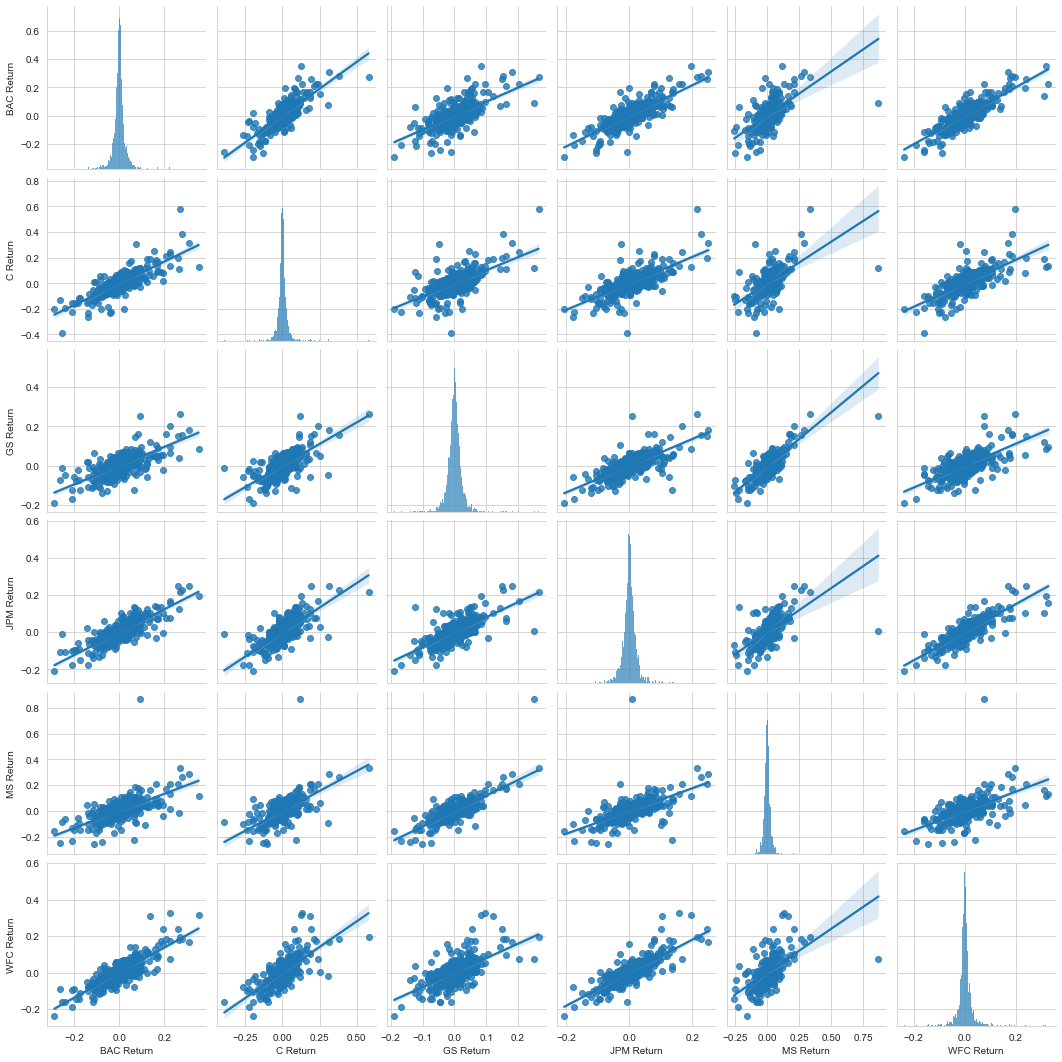

In [21]:
sns.pairplot(returns[1:],kind='reg') # salto il primo valore del DataFrame, che è un NaN
sns.set_style('white')

**Fra i vari andamenti, quelli che saltano all'occhio sono quelli delle banche CitiGroup e Wells Fargo. La spiegazione per la prima potrebbe essere il [grande crash](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) in valore durante la crisi finanziaria globale.**

Si indaga il migliore e il peggiore giorno, relativamente al valore return, per ciascuna banca.

In [23]:
returns.idxmax() # giorno con migliore return

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [24]:
returns.idxmin() # giorno con peggiore return

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**4 banche condividono lo stesso giorno peggiore, il 20 gennaio 2009. Questo è il cosiddetto Inauguration Day, giorno dell'insediamento del Presidente degli Stati Uniti alla Casa Bianca. La prima cosa che ha fatto Barack Obama quando si è insediato è stato rimuovere 1000 miliardi di dollari di 'asset tossici' dalle banche.**

**Da notare anche che la JPM ha avuto il miglior return il giorno dopo il suo peggior return, questo coincide con uno stock split.**

Si indaga su quale banca sia la più rischiosa nel periodo di interesse.

In [25]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

**I profili sono abbastanza simili, ma la CitiGroup parrebbe la più rischiosa.**

Si cerca nel 2015, quasi alla fine del periodo, quale fosse la più rischiosa.

In [28]:
returns.loc['2015'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Le più rischiose erano la Morgan Stanley e la Bank of America, di poco.**

Per visualizzare meglio quanto appena detto, si graficano i return per la CitiGroup nel 2008 e per la Morgan Stanley nel 2015.

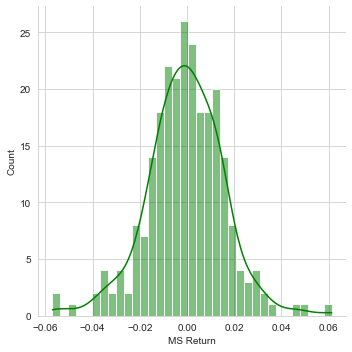

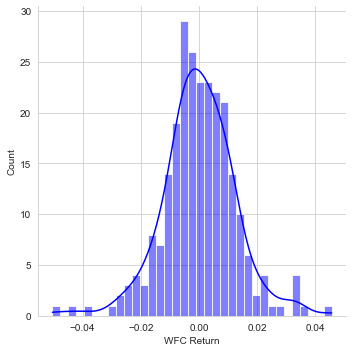

In [56]:
sns.displot(returns['MS Return'].loc['2015'],color='green',bins=35,kde=True)
# la confronto con quella meno rischiosa
sns.displot(returns['WFC Return'].loc['2015'],color='blue',bins=35,kde=True) 

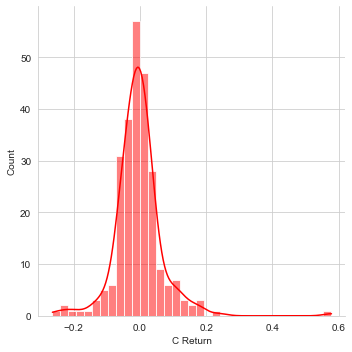

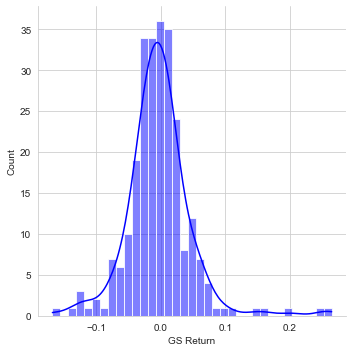

In [57]:
sns.displot(returns['C Return'].loc['2008'],color='red',bins=35,kde=True)
# la confronto con quella meno rischiosa
sns.displot(returns['GS Return'].loc['2008'],color='blue',bins=35,kde=True) 

Nella parte conclusiva del progetto si faranno dei grafici, interattivi e non, collegati all'analisi finanziaria, sebbene a questo livello si trattino banalmente di nozioni di statistica.

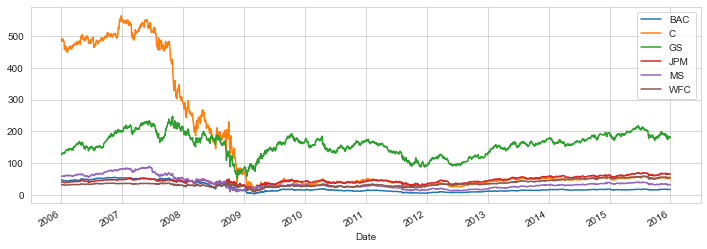

In [58]:
# Grafico NON interattivo
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [59]:
# Grafico interattivo 
bank_stocks.xs('Close',axis=1,level='Stock Info').iplot()

Si analizzano le Medie Mobili (Moving Averages) di questi stock nel 2008.

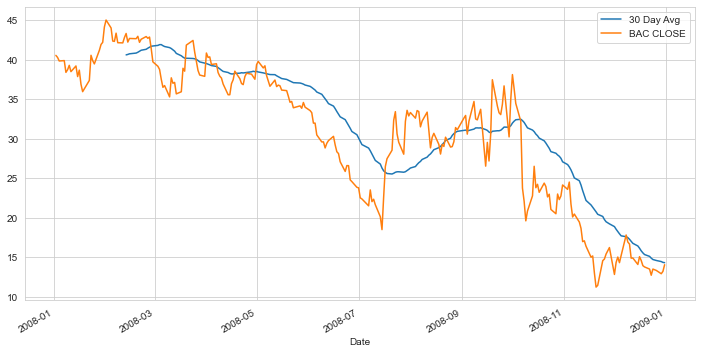

In [60]:
# Media mobile per la Bank of America nel 2008, con periodo di rolling di 30 giorni
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

Si analizza la correlazione fra le colonne 'Close' delle varie banche e si visualizza con una heatmap ed un clustermap.

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

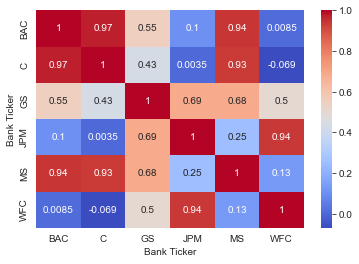

In [61]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), 
            annot=True, cmap='coolwarm')

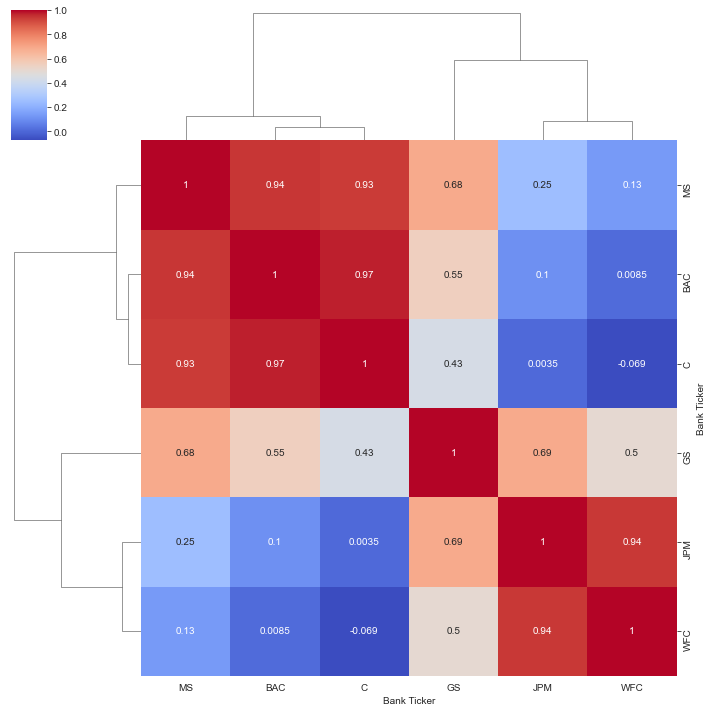

In [62]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(), annot=True, cmap='coolwarm')

Si crea un plot a candela degli stock della Bank of America nel 2015.

In [63]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

Si crea un plot con le Medie Mobili Semplici (Simple Moving Averages) della Morgan Stanley nel 2015, per periodi di 13, 21 e 55 giorni.

In [64]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Si crea un plot a Bollinger Band per la Bank of America nel 2015. 

*Un Bollinger Band rappresenta al centro la Media Mobile e sopra e sotto di questa una deviazione standard di distanza.*

In [65]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

E qui si conclude il progetto di Exploratory Data Analysis (EDA) in ambito finanziario.